# MiniProject III: NLP

Objective:
- Build a text classification model to distinguish between:
    - 0 = Fake News
    - 1 = Real News → Based on news headlines only.

Files:
- training_data.csv: Contains labeled news headlines (0 = fake, 1 = real).
- testing_data.csv: Contains unlabeled headlines with label 2, to be replaced by your model’s predictions.
- testing_data_predictions.csv: Contains labeled news headlines (0 = fake, 1 = real) as predicted by our trained model.
- NLP.ipynb: working notebook 

Models:
- Model_1: LinearRegression 
- Model_2/Transformer Model 1: "distilbert-base-uncased-finetuned-sst-2-english"
    - https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english 
- Model_3/Transformer Model 2: "jy46604790/Fake-News-Bert-Detect"
    - https://huggingface.co/jy46604790/Fake-News-Bert-Detect 
- Model_3.2/Transformer Model 2.2: Same model, "distilbert-base-uncased-finetuned-sst-2-english", tuned/trained to our dataset. 
    - Note this model is incomplete
    - https://huggingface.co/jy46604790/Fake-News-Bert-Detect 
- Model_4: RandomForest using TF-IDF preprocessing parameters

Task Breakdown:

0. Load the data

1. Preprocessing & EDA:
- Preprocessing:
    - Clean & Preprocess Text
    - Basic EDA
    - Clean the text (punctuation, case, etc.)
    - Pre-tokenization, lemmatization, and basic EDA (e.g., label value counts) 
    - see full processing pipeline using NLK for details of steps

- EDA:
    - pandas for loading and exploring the data
    - .value_counts() for class balance
    - various visuals with matplotlib or seaborn (e.g. bar plot of real vs fake) 

- Preprocessing Details: We applied a full preprocessing pipeline using NLTK including tokenization and lemmatization to clean the headlines before vectorization and modeling:
    1. Lowercasing → All text was converted to lowercase for consistency.
    2. Punctuation and Number Removal → Used regex ([^a-z\s]) to remove everything that wasn't a letter or space.
    3. Tokenization → Used nltk.word_tokenize() to split each headline into individual word tokens.
    4. Stopword Removal → Removed common words like "the", "and", "is" using NLTK’s English stopwords list.
    5. Lemmatization → Used WordNetLemmatizer from NLTK to reduce each word to its base form (e.g., “running” → “run”).

2. Vectorization:
- After preprocessing, we used TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert text into numerical features (numerical vectors).
    - Used TfidfVectorizer from sklearn to build feature vectors.
    - Limited to the top 5,000 most important words (based on frequency and uniqueness). 
    - Also tested with 10,000 features — predictions were 99.9% identical (only one row changed).

3. Split Data + Model Training:
    - Split validation set from training set
    - Train a classifier (e.g., Logistic Regression, Random Forest)
    - No need for hyperparameter tuning or comparing multiple models unless extra time.
    - model learns/learns structure by:
        - Word frequency
        - Co-occurrence of certain terms
        - Position of words (if using n-grams)
        - Whether certain phrases tend to appear in real vs. fake headlines

4. Model Evaluation:
    - Use train/val split to evaluate on part of the training data.
    - Print a confusion matrix, calculate accuracy, classification report

5. Prediction on Test Set:
    - Predict labels (0 or 1) for the entries with label 2 in testing_data.csv.
    - Save results in same format as original. New file is called: testing_data_predictions.csv — no extra columns.

6. Optional (Advanced):
    - If there's time, compare your model with a transformer-based model (like BERT) using pretrained vectorizer weights.
    - Transformer Model 1:
    - Transformer Model 2:
    - Transformer Model 3 (in progress): trained on our dataset 

# Model_1: LinearRegression 


# Load Data and Inspect (Basic EDA) + Minimal Preprocessing (adding headers)

In [1]:
import pandas as pd

# Step 1: Load raw training and test data (no headers, comma-separated)
train = pd.read_csv(r"C:\Users\Gebruiker\Desktop\IronHack\project-3-nlp\dataset\training_data.csv")
test = pd.read_csv(r"C:\Users\Gebruiker\Desktop\IronHack\project-3-nlp\dataset\testing_data.csv")

In [2]:
#preview raw data
print(train.columns)
print(test.columns)

Index(['0\tdonald trump sends out embarrassing new year‚s eve message; this is disturbing'], dtype='object')
Index(['2\tcopycat muslim terrorist arrested with assault weapons'], dtype='object')


In [3]:
# Step 1: Load training and test data (add headers, comma-separated)
#Manually set the column names for the the two columns in each file (create headers for the columns)
    #Columns are: "headline" and "label" (fake or real)

import pandas as pd

train = pd.read_csv(r"C:\Users\Gebruiker\Desktop\IronHack\project-3-nlp\dataset\training_data.csv", sep = "\t", header=None, names=['Label', 'Headline'])
test = pd.read_csv(r"C:\Users\Gebruiker\Desktop\IronHack\project-3-nlp\dataset\testing_data.csv", sep = "\t", header=None, names=['Label', 'Headline'])

# Check structure
print(train.head())
print(test.head())
#print(train['Label'].value_counts())

   Label                                           Headline
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...
  Label                                           Headline
0     2  copycat muslim terrorist arrested with assault...
1     2  wow! chicago protester caught on camera admits...
2     2   germany's fdp look to fill schaeuble's big shoes
3     2  mi school sends welcome back packet warning ki...
4     2  u.n. seeks 'massive' aid boost amid rohingya '...


In [4]:
# Step 2: Inspect
print("Training shape:", train.shape)
print("Test shape:", test.shape)

print("\nFirst 3 rows of training data:")
print(train.head(3))

print("\nLabel distribution in training set:")
print(train['Label'].value_counts())

print("\nFirst 3 rows of test data:")
print(test.head(3))

print("\nLabel distribution in test set:")
print(test['Label'].value_counts())

Training shape: (34152, 2)
Test shape: (9984, 2)

First 3 rows of training data:
   Label                                           Headline
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...

Label distribution in training set:
Label
0    17572
1    16580
Name: count, dtype: int64

First 3 rows of test data:
  Label                                           Headline
0     2  copycat muslim terrorist arrested with assault...
1     2  wow! chicago protester caught on camera admits...
2     2   germany's fdp look to fill schaeuble's big shoes

Label distribution in test set:
Label
2     9982
﻿0       2
Name: count, dtype: int64


In [5]:
print(train.columns)
print(test.columns)

Index(['Label', 'Headline'], dtype='object')
Index(['Label', 'Headline'], dtype='object')


### EDA Visualizations (Precleaning):

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18596\3038445973.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=train, palette='pastel')


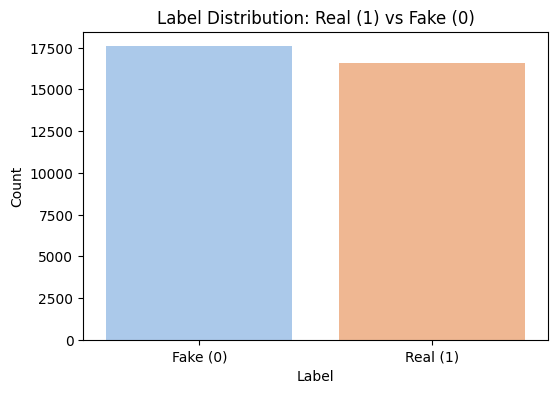

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=train, palette='pastel')
plt.title('Label Distribution: Real (1) vs Fake (0)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Fake (0)', 'Real (1)'])
plt.show()


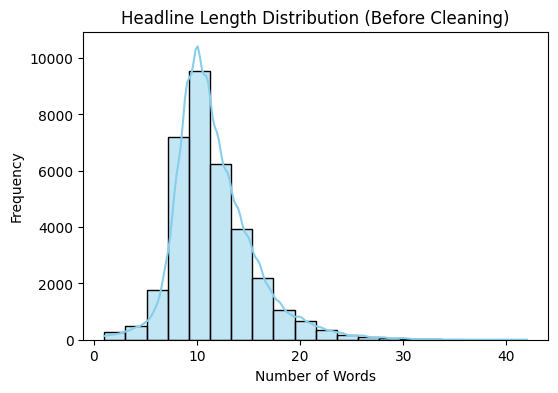

In [7]:
# Add column for headline length (before cleaning)
train['headline_length'] = train['Headline'].apply(lambda x: len(x.split()))

plt.figure(figsize=(6, 4))
sns.histplot(train['headline_length'], bins=20, kde=True, color='skyblue')
plt.title('Headline Length Distribution (Before Cleaning)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18596\3287969341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='headline_length', data=train, palette='pastel')


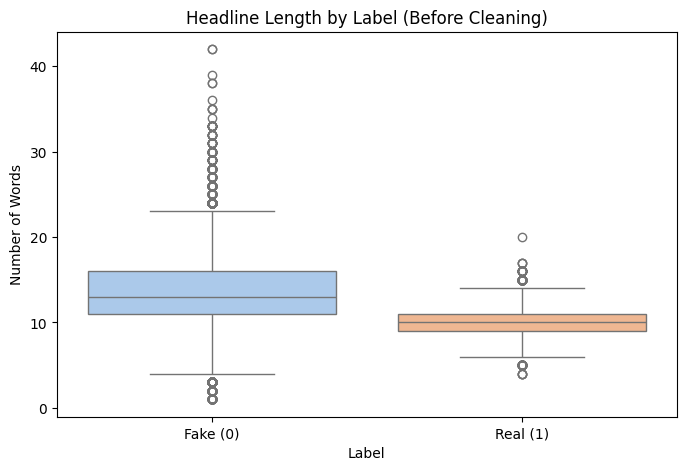

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Label', y='headline_length', data=train, palette='pastel')
plt.title('Headline Length by Label (Before Cleaning)')
plt.xlabel('Label')
plt.ylabel('Number of Words')
plt.xticks(ticks=[0,1], labels=['Fake (0)', 'Real (1)'])
plt.show()


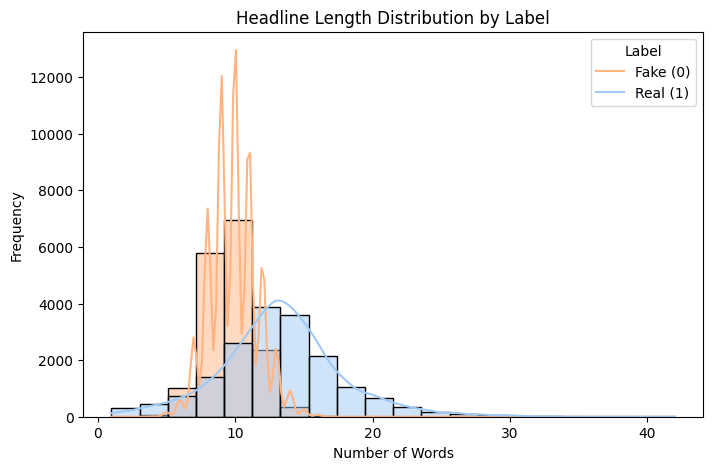

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train, x='headline_length', hue='Label', bins=20, kde=True, palette='pastel')
plt.title('Headline Length Distribution by Label')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=['Fake (0)', 'Real (1)'])
plt.show()

# Preprocessing:
- we preprocessed by creating a funciton that does all the cleaning including:
    - remove stop words
    - lemmatization
    - remove punctuation/numbers

- note, we may want to adjust this later
- note, we may want to adjust stop words later because they may be indicative of fake news.

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download needed resources (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Set up tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Cleaning function (includes the below)
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers (using ^ removes everything thats not lowercase letters and whitespaces)
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords (using list comprehension)
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Apply to both train and test sets
train['clean_headline'] = train['Headline'].apply(clean_text)
test['clean_headline'] = test['Headline'].apply(clean_text)

# Preview cleaned version
train[['Headline', 'clean_headline']].head()

,Headline,clean_headline
0,donald trump sends out embarrassing new year‚s...,donald trump sends embarrassing new year eve m...
1,drunk bragging trump staffer started russian c...,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes an internet joke ...,sheriff david clarke becomes internet joke thr...
3,trump is so obsessed he even has obama‚s name ...,trump obsessed even obamas name coded website ...
4,pope francis just called out donald trump duri...,pope francis called donald trump christmas speech


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18596\2191424802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=train, palette='pastel')


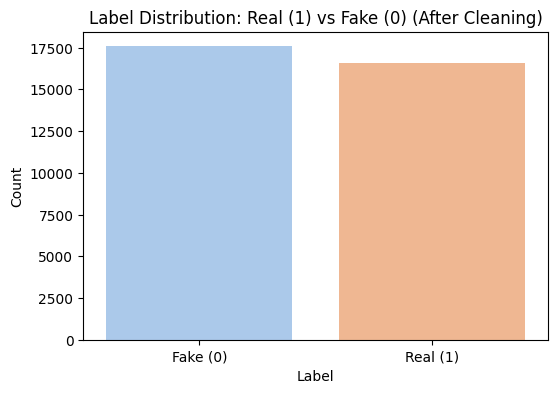

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=train, palette='pastel')
plt.title('Label Distribution: Real (1) vs Fake (0) (After Cleaning)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Fake (0)', 'Real (1)'])
plt.show()


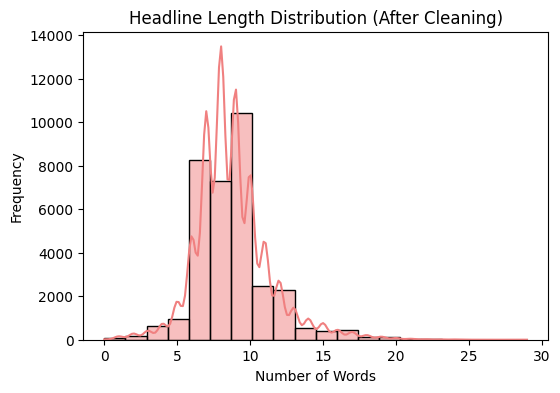

In [13]:
# Add new length column for cleaned headlines
train['clean_length'] = train['clean_headline'].apply(lambda x: len(x.split()))

plt.figure(figsize=(6, 4))
sns.histplot(train['clean_length'], bins=20, kde=True, color='lightcoral')
plt.title('Headline Length Distribution (After Cleaning)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18596\728123003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='clean_length', data=train, palette='pastel')


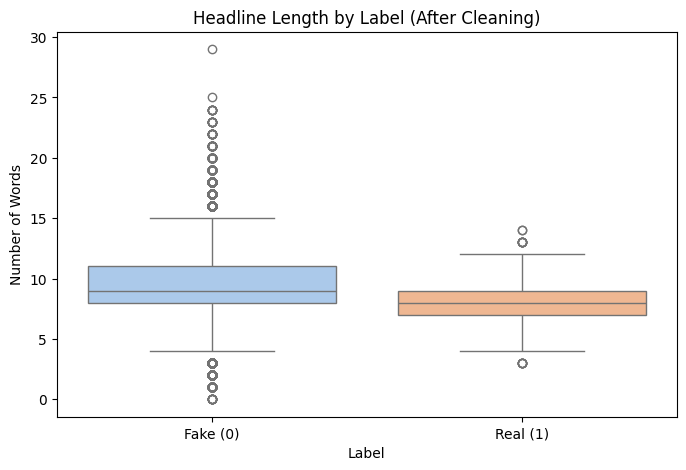

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Label', y='clean_length', data=train, palette='pastel')
plt.title('Headline Length by Label (After Cleaning)')
plt.xlabel('Label')
plt.ylabel('Number of Words')
plt.xticks(ticks=[0,1], labels=['Fake (0)', 'Real (1)'])
plt.show()


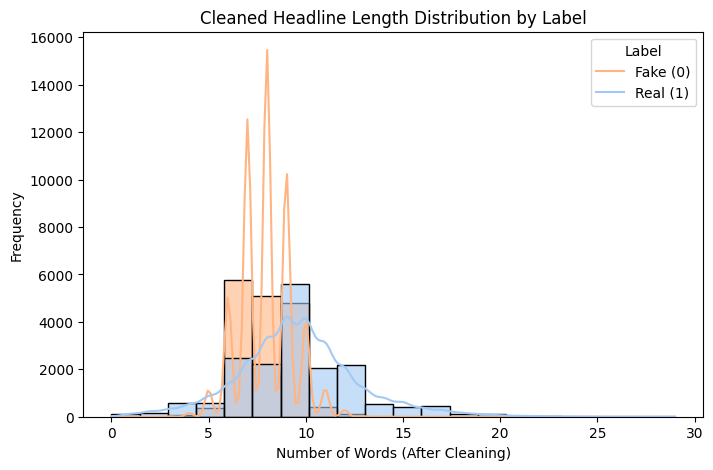

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(
    data=train,
    x='clean_length',
    hue='Label',
    bins=20,
    kde=True,
    palette='pastel',
    alpha=0.6
)
plt.title('Cleaned Headline Length Distribution by Label')
plt.xlabel('Number of Words (After Cleaning)')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=['Fake (0)', 'Real (1)'])
plt.show()


### Side by Side Visualizations (pre and post cleaning):

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18596\3266928183.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=train, palette='pastel')
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18596\3266928183.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=train, palette='pastel')
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18596\3266928183.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='headline_length', data=train, palette='pastel')
C:\Users\Gebruiker\AppData\Local\Temp\ipykern

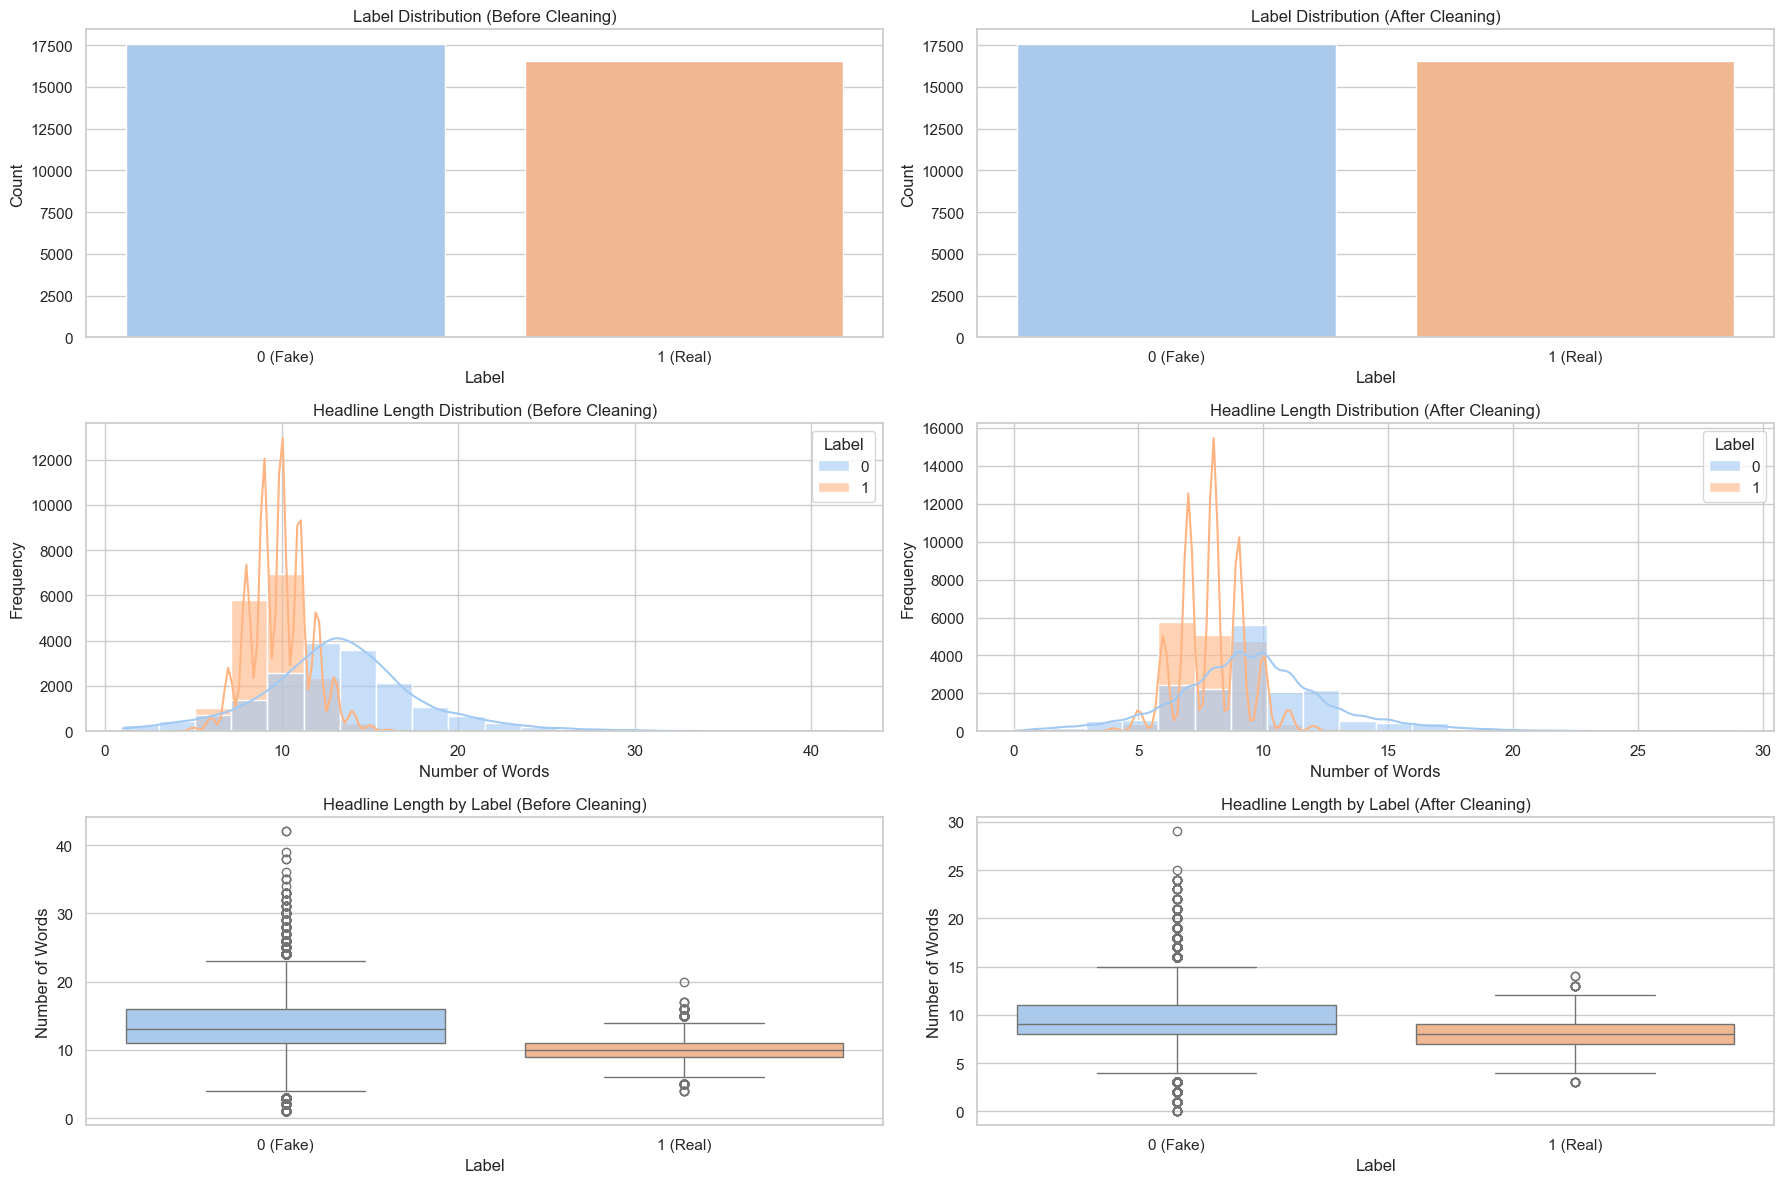

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(18, 12))

# Custom label mapping
label_names = ['0 (Fake)', '1 (Real)']

# 1A: Label Distribution - Before
plt.subplot(3, 2, 1)
sns.countplot(x='Label', data=train, palette='pastel')
plt.title('Label Distribution (Before Cleaning)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=label_names)

# 1B: Label Distribution - After
plt.subplot(3, 2, 2)
sns.countplot(x='Label', data=train, palette='pastel')
plt.title('Label Distribution (After Cleaning)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=label_names)

# 2A: Headline Length Histogram - Before
plt.subplot(3, 2, 3)
sns.histplot(data=train, x='headline_length', hue='Label', bins=20, kde=True, palette='pastel', alpha=0.6)
plt.title('Headline Length Distribution (Before Cleaning)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# 2B: Headline Length Histogram - After
plt.subplot(3, 2, 4)
sns.histplot(data=train, x='clean_length', hue='Label', bins=20, kde=True, palette='pastel', alpha=0.6)
plt.title('Headline Length Distribution (After Cleaning)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# 3A: Boxplot by Label - Before
plt.subplot(3, 2, 5)
sns.boxplot(x='Label', y='headline_length', data=train, palette='pastel')
plt.title('Headline Length by Label (Before Cleaning)')
plt.xlabel('Label')
plt.ylabel('Number of Words')
plt.xticks(ticks=[0, 1], labels=label_names)

# 3B: Boxplot by Label - After
plt.subplot(3, 2, 6)
sns.boxplot(x='Label', y='clean_length', data=train, palette='pastel')
plt.title('Headline Length by Label (After Cleaning)')
plt.xlabel('Label')
plt.ylabel('Number of Words')
plt.xticks(ticks=[0, 1], labels=label_names)

plt.tight_layout()
plt.show()


# Vectorization:

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can increase this if needed. Note, we also ran the model at 10,000 and the results were the same with 1 row (news headline) getting a different prediction.

# Fit on training data and transform both train and test
X_train = vectorizer.fit_transform(train['clean_headline'])
X_test = vectorizer.transform(test['clean_headline'])

# Target labels
y_train = train['Label']


# Split and Train Model:

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Split training data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Evaluate on Validation Set:
- note, we do this validation differently because of the way this project is structured (the datasets) 
    - Normally we use the validation set to tune the model: 
        1. You get a dataset with labels (e.g., real vs fake news).
        2. You split it into:
            - Training set → used to train the model
            - Validation/test set → used to evaluate model performance where val set (without labels of course) is used to tune the model and test set is used to evaluate the model. 
        3. You compare predictions to real/actual labels (because they are known).
    - Here the test set is blind so we use the validation set to evaluate performance
        
        IZ finish this portion of logic



In [21]:
# Predict on validation set
val_preds = model.predict(X_val_split)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_val_split, val_preds))

print("\nClassification Report:")
print(classification_report(y_val_split, val_preds))

print("\nAccuracy Score:")
print(accuracy_score(y_val_split, val_preds))

Confusion Matrix:
[[3245  270]
 [ 210 3106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3515
           1       0.92      0.94      0.93      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831


Accuracy Score:
0.9297321036451471


Accuracy Estimation: Based on evaluation on the validation set, we estimate the model will achieve approximately 93% accuracy on the unseen test data.
- this accuracy score is high and satisfactory for a good model.

Other Metrics and Overall Evaluation:
- Confusion Matrix: We see the model has predicted:
    - 3244 headlines as fake when they were actually fake (True Negatives)
    - 209 headlines as fake when they were actually real (False Negatives)
    - 271 headlines as real when they were actually fake (False Positives)
    - 3107 headlines as real when they were actually real (True Positives)   

- The model performs consistently well across both classes — fake (0) and real (1) news.
- Precision is high for both labels (~92–94%), meaning that when the model predicts an article is fake or real, it's usually correct (low false positives).
- Recall is also high (~92–94%), indicating the model successfully identifies most of the true fake and real headlines (low false negatives).
- The F1-scores are balanced (~0.93 for both), confirming that the model doesn’t favor one class over the other.
    - This balance is important in fake news detection, since both false positives (flagging real news as fake) and false negatives (missing actual fake news) carry consequences.
- Precision ≈ Recall ≈ F1: model is not biased towards any one class and doesn't over or underpredict.
- Accuracy, precision, recall, and F1 are all aligned → balanced performance across classes   
- Overall, the model is well-calibrated and generalizes well, as seen in its high validation accuracy of ~93%.

# Predict on Real Test Set:
- This generates a csv file, testing_data_predictions.csv, with the predicted labels. 
- The above ~93% accuracy, based on validation performance, is how we predict our model with perform on unseen test data.

In [22]:
# Predict on the real test set, replace placeholder labels, and save to CSV
test_preds = model.predict(X_test)              # Predict labels on cleaned, vectorized test data
test['Label'] = test_preds                      # Replace placeholder labels (2) with predicted labels (0 or 1)
test.to_csv('testing_data_predictions.csv', index=False, header=False)  # Export (save to CSV) in required format: no header, no index, same structure as original

# Model_2 (Transformer Model 1): Sentiment  

In [23]:
from transformers import pipeline

# Load sentiment-analysis-style pipeline (can be used for binary classification)
classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

# Example: predict single headline
classifier("donald trump declares war on mars")

c:\Users\Gebruiker\anaconda3\envs\nlp-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.972669243812561}]

| Sentiment Label | Your Label |
| --------------- | ---------- |
| `'POSITIVE'`    | `1` → Real |
| `'NEGATIVE'`    | `0` → Fake |


In [24]:
# Recover the original cleaned text corresponding to validation set
X_raw = train['clean_headline']  # This is the preprocessed text
X_raw_train, X_raw_val, _, _ = train_test_split(X_raw, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [25]:
# Run BERT on validation set
bert_labels = [classifier(text)[0]['label'] for text in X_raw_val]

# Convert 'POSITIVE' to 1 (real), 'NEGATIVE' to 0 (fake)
bert_preds = [1 if label == 'POSITIVE' else 0 for label in bert_labels]


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("BERT Accuracy:", accuracy_score(y_val_split, bert_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val_split, bert_preds))
print("\nClassification Report:")
print(classification_report(y_val_split, bert_preds))


BERT Accuracy: 0.55262772654077

Confusion Matrix:
[[2874  641]
 [2415  901]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.82      0.65      3515
           1       0.58      0.27      0.37      3316

    accuracy                           0.55      6831
   macro avg       0.56      0.54      0.51      6831
weighted avg       0.56      0.55      0.52      6831



#### Transformer Model 1 Interpretation:

- We applied a transformer-based model (DistilBERT fine-tuned on sentiment analysis) to our fake news task. 
- This sentiment model is fine-tuned on the SST-2 dataset, which labels movie review sentences as:
    - 'POSITIVE' (emotionally positive) = real (1)
    - 'NEGATIVE' (emotionally negative) = fake (0)

- Confusion Matrix: We see the model has predicted:
    - 2874 headlines as fake when they were actually fake (True Negatives)
    - 2415 headlines as fake when they were actually real (False Negatives)
    - 641 headlines as real when they were actually fake (False Positives)
    - 901 headlines as real when they were actually real (True Positives)   

- As expected, performance was weak, low scores, unbalanced results across metrics, because the model was not trained for truth classification, but for emotional tone. Likewise, the model was not trained on our dataset. This shows that while transformer models are powerful, task-specific fine-tuning is critical.    

# Model_3 (Transformer Model 2): BERT Fake News Detection

In [27]:
from transformers import pipeline

classifier = pipeline("text-classification", model="mrm8488/bert-tiny-finetuned-fake-news-detection")

# Predict on one headline
classifier("pope endorses donald trump for president")

c:\Users\Gebruiker\anaconda3\envs\nlp-env\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Gebruiker\.cache\huggingface\hub\models--mrm8488--bert-tiny-finetuned-fake-news-detection. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


[{'label': 'LABEL_1', 'score': 0.9991233944892883}]

In [28]:
# Use the same cleaned text used for TF-IDF vectorization
X_raw = train['clean_headline']
X_raw_train, X_raw_val, _, _ = train_test_split(
    X_raw, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [29]:
# Run predictions using the BERT model
bert_labels = [classifier(text)[0]['label'] for text in X_raw_val]

# Map 'FAKE' to 0, 'REAL' to 1
bert_preds = [0 if label == 'FAKE' else 1 for label in bert_labels]


In [30]:
# Evaluate

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Transformer Accuracy:", accuracy_score(y_val_split, bert_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val_split, bert_preds))
print("\nClassification Report:")
print(classification_report(y_val_split, bert_preds))


Transformer Accuracy: 0.48543405065144196

Confusion Matrix:
[[   0 3515]
 [   0 3316]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3515
           1       0.49      1.00      0.65      3316

    accuracy                           0.49      6831
   macro avg       0.24      0.50      0.33      6831
weighted avg       0.24      0.49      0.32      6831



c:\Users\Gebruiker\anaconda3\envs\nlp-env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Gebruiker\anaconda3\envs\nlp-env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Gebruiker\anaconda3\envs\nlp-env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

#### Transformer Model 2 Interpretation:
- Confusion Matrix: we see the model has predicted everything as real. Specificially, 3515 headlines were predicted as real when they were actually fake (False Positive), and 3316 headlines were predicted real when they were actually real (True Positives).

- As expected, performance was weak, low scores, unbalanced results across metrics, because the model was not trained on our dataset.  

# Model_3.2 (Transformer Model 3): 
- Here we tune/train Model_3 (Transfer Model 2) on our dataset.
- IN PROGRESS, not included here

# Model_4: Random Forest (with TF-IDF parameters for preprocessing) 
- By passing pre-processing parameters to TF-IDF, we can reduce the code for a simple classification task


In [31]:
# Import Data
import pandas as pd

train = pd.read_csv(r"C:\Users\Gebruiker\Desktop\IronHack\project-3-nlp\dataset\training_data.csv", sep = "\t", header=None, names=['Label', 'Headline'])
test = pd.read_csv(r"C:\Users\Gebruiker\Desktop\IronHack\project-3-nlp\dataset\testing_data.csv", sep = "\t", header=None, names=['Label', 'Headline'])

In [32]:
# Split Data (20% val from train set)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train['Headline'], train['Label'], test_size=0.2, random_state=42, stratify=train['Label']
)

In [33]:
# Create TF-IDF vectorizer (with pre-processing parameters)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words="english")

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [34]:
# Initalize (train and fit) the RandomForest Model with the below parameters:

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier (n_estimators=200,random_state=42, n_jobs=-1) # num estimators, random state, n_jobs 

model.fit(X_train_tfidf, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
# Evaluate (use val split data-unseen data to provide an estimate of how the model will perform)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

val_preds = model.predict(X_test_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, val_preds))

print("\nClassification Report:")
print(classification_report(y_test, val_preds))

print("\nAccuracy Score:")
print(accuracy_score(y_test, val_preds))

Confusion Matrix:
[[3210  305]
 [ 278 3038]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3515
           1       0.91      0.92      0.91      3316

    accuracy                           0.91      6831
   macro avg       0.91      0.91      0.91      6831
weighted avg       0.91      0.91      0.91      6831


Accuracy Score:
0.9146537842190016


In [36]:
# Transform the actual test set
test_tfidf = vectorizer.transform(test['Headline'])

# Predict on the actual test data
test_preds = model.predict(test_tfidf)

# Replace the placeholder 'Label' values with predictions
test['Label'] = test_preds

# Save the results to CSV (same format as original)
test.to_csv('testing_data_predictions_RandomForest.csv', index=False, header=False)

### Model_4 RandomForest Interpretation:
- The results are very similar to the LinearRegression model.
- The accuracy score ~92% is high and satisfactory for a good model.
- The model performs consistently well across both classes — fake (0) and real (1) news.
- Precision is high for both labels (~91–92%), meaning that when the model predicts an article is fake or real, it's usually correct (low false positives).
- Recall is also high (~92%), indicating the model successfully identifies most of the true fake and real headlines (low false negatives).
- The F1-scores are balanced (~0.92 for both), confirming that the model doesn’t favor one class over the other.
    - This balance is important in fake news detection, since both false positives (flagging real news as fake) and false negatives (missing actual fake news) carry consequences.
- Precision ≈ Recall ≈ F1: model is not biased towards any one class and doesn't over or underpredict.
- Accuracy, precision, recall, and F1 are all aligned → balanced performance across classes   
- Overall, the model is well-calibrated and generalizes well, as seen in its high validation accuracy of ~92%.